

---

# Modelagem Preditiva de Evasão de Clientes

![imagem-capa](https://github.com/crodriguesbianca/churnPrediction/blob/main/imagem-capa.jpg?raw=true)


Este projeto foi desenvolvido para a disciplina *Data Discovery e Analytics* do curso de Pós-Graduação em Ciência de Dados da PUC Minas. O objetivo central foi propor um modelo de análise preditiva capaz de identificar clientes com maior probabilidade de evasão (churn) em uma empresa de telecomunicações.

O desenvolvimento do projeto seguiu as seguintes etapas:

1. **Compreensão do problema:** pesquisar sobre a evasão de clientes e sobre quais modelos de classificação são utilizados neste contexto;
2. **Seleção dos modelos:** escolha da **Regressão Logística** e da **Árvore de Decisão**, por serem amplamente utilizados em problemas de churn.
3. **Coleta dos dados:** Dados disponibilizados aqui: [Link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download);
4. **Pré-processamento de dados:** realizar todo o processo de limpeza e tratamento de dados.
5. **Análise Exploratória de Dados (EDA):** identificação de padrões, inconsistências e variáveis mais relevantes para a modelagem.
6. **Modelagem Preditiva:** aplicação inicial da **Regressão Logística** e, em seguida, da **Árvore de Decisão**, avaliando o desempenho de ambos.
7. **Comparação e decisão:** definição do modelo mais adequado para prever a evasão, com base em métricas de desempenho.


Toda a análise foi realizada no **Google Colab**, utilizando a linguagem **R**




---


## Carregamento dos dados e instalação de pacotes





In [ ]:
install.packages('tidyverse') #manipulação de dados
install.packages('cowplot') #visualização - unir gráficos
install.packages('caret') #modelos estatísticos
install.packages('corrplot') #matriz de correlação


In [ ]:
# chamando os pacotes já instalados
library(caret)
library(tidyverse)
library(cowplot)
library(corrplot)


In [5]:
#carregando dados para o Data Frame (dados)
dados <- read.csv("VIVO_CHURN.csv", stringsAsFactors = T)


Inicialmente, vamos dar uma olhada no conjunto de dados. A base possui **7.043 observações** e **21 variáveis**, sendo a maioria delas **categóricas (fatores)**


In [6]:
#visualização dos dados
head(dados)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


## Análise Exploratória e Pré-Processamento

**1. Visão geral do conjunto de dados**

Inicialmente, foi gerado um resumo estatístico das variáveis, permitindo identificar características gerais e possíveis necessidades de tratamento, como valores ausentes ou desbalanceamento de classes.


In [7]:
summary(dados)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

**2. Tratamento de valores ausentes**

A análise identificou 11 valores nulos, que não estavam relacionados a nenhuma regra de negócio e representavam uma pequena parcela do dataset. Optou-se por removê-los, garantindo que não houvesse impacto significativo na modelagem preditiva.

In [ ]:
#Verificando a presença de valores nulos

colSums(is.na(dados)) #se nulo


In [ ]:
# Removendo os valores nulos

dados_1 <- dados[!is.na(dados$TotalCharges),]
            #diferente do nulo para o novo data frame (dados_1)
colSums(is.na(dados_1))

**3. Análise de outliers**

Para identificar outliers, foram avaliados boxplots, considerando os dados separados pela variável churn. Apesar de algumas observações extremas, optou-se por não removê-las, pois, no conjunto completo, não existem valores que comprometam a modelagem preditiva.

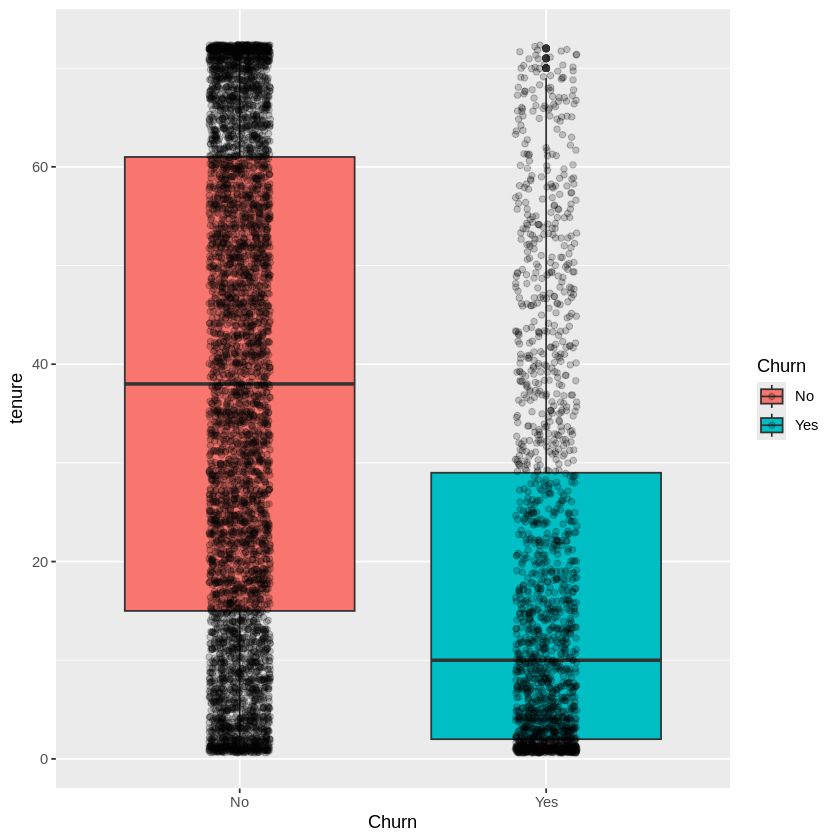

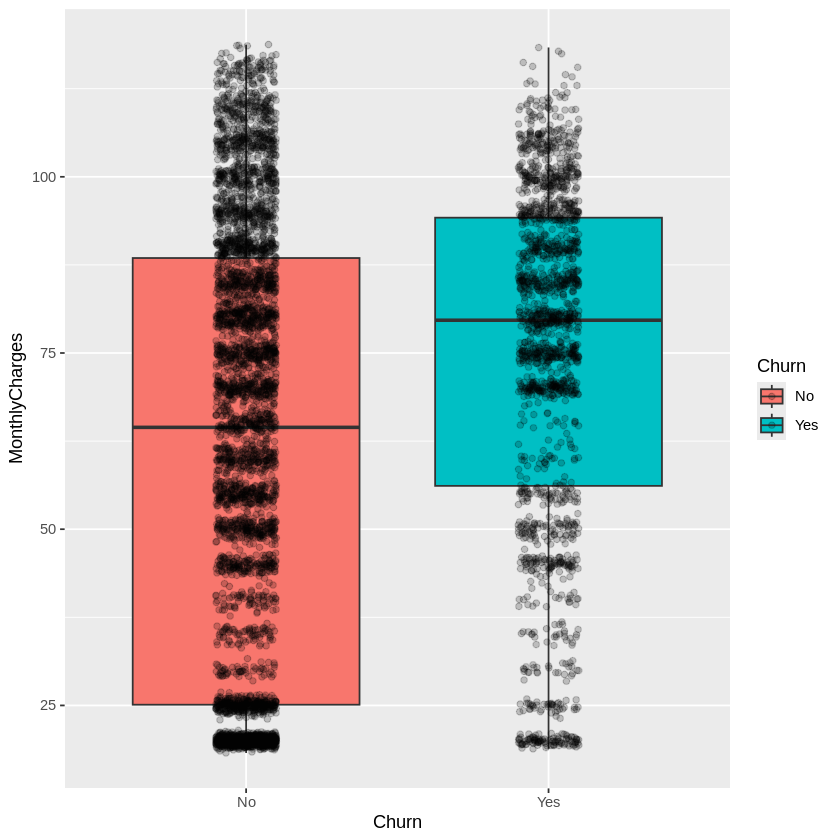

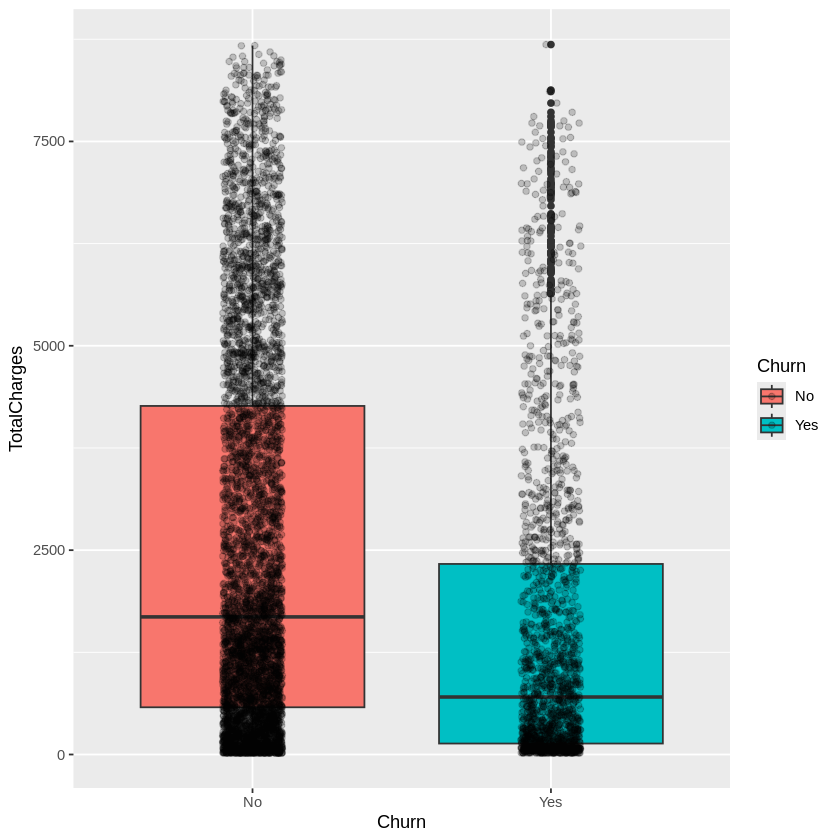

In [ ]:
#outliers - visualizar a dispersão dos dados via boxplot
dados_1 %>%
  ggplot(aes(x=Churn, y=tenure, fill=Churn)) +
    geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)

dados_1 %>%
  ggplot(aes(x=Churn, y= MonthlyCharges, fill = Churn)) +
    geom_boxplot() + geom_jitter(width=0.1, alpha=0.2)

dados_1 %>%
  ggplot(aes(x=Churn, y=TotalCharges, fill =Churn)) +
    geom_boxplot() + geom_jitter(width = 0.1, alpha=0.2)

**4. Identificação de variável causal**

Para verificar se alguma variável poderia influenciar a evasão (churn), os dados foram analisados visualmente:

- Variáveis qualitativas: gráficos de barras foram utilizados para comparar a distribuição entre clientes que permaneceram e os que saíram.

- Variáveis quantitativas: gráficos de dispersão permitiram identificar padrões e diferenças significativas entre os grupos.

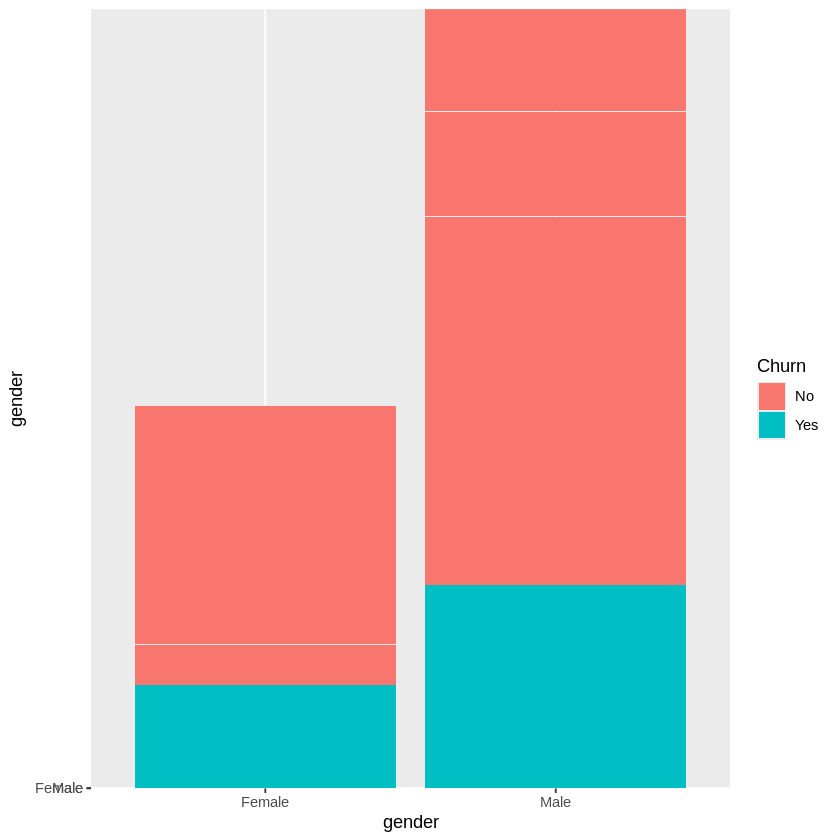

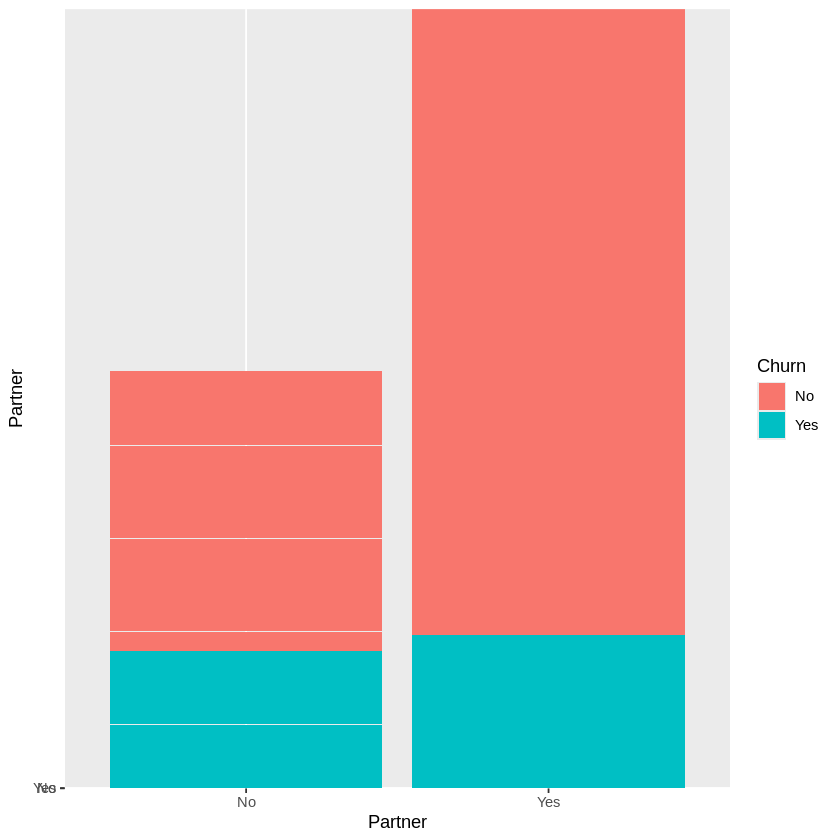

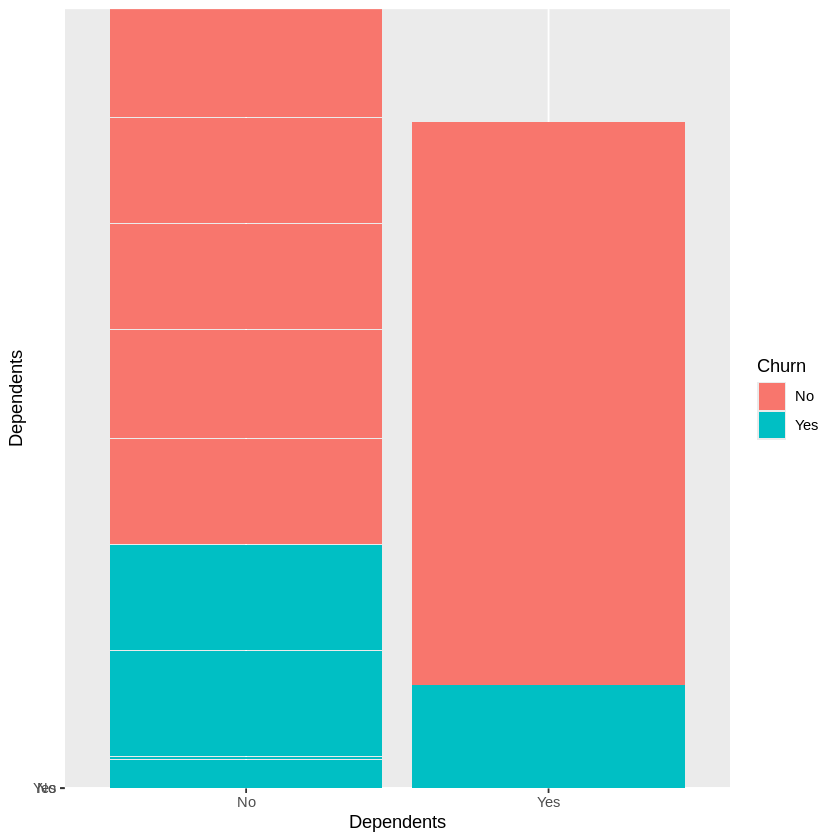

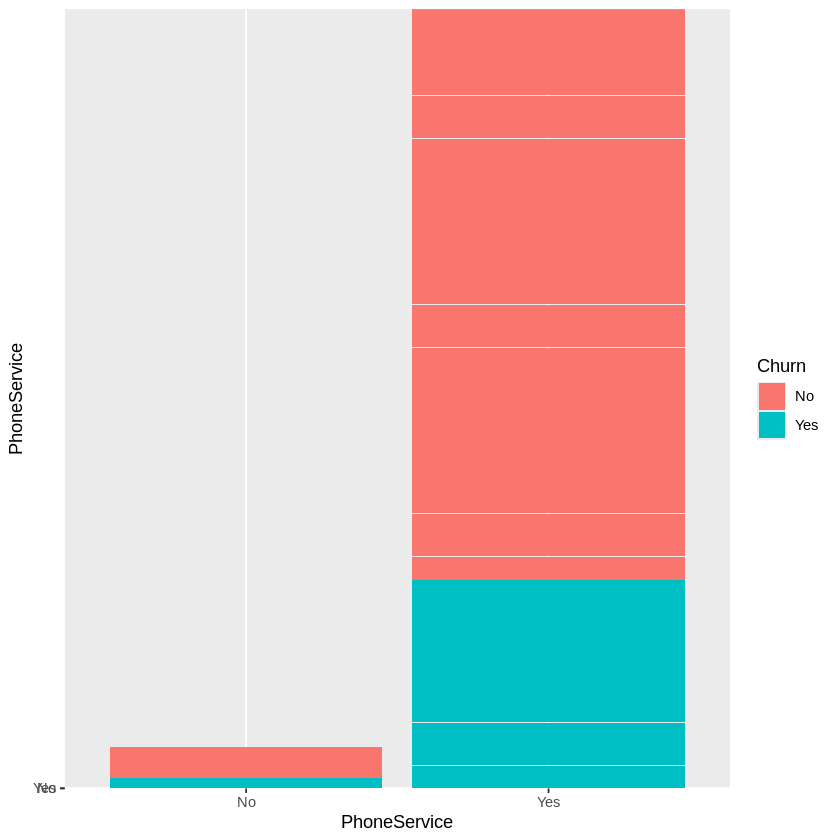

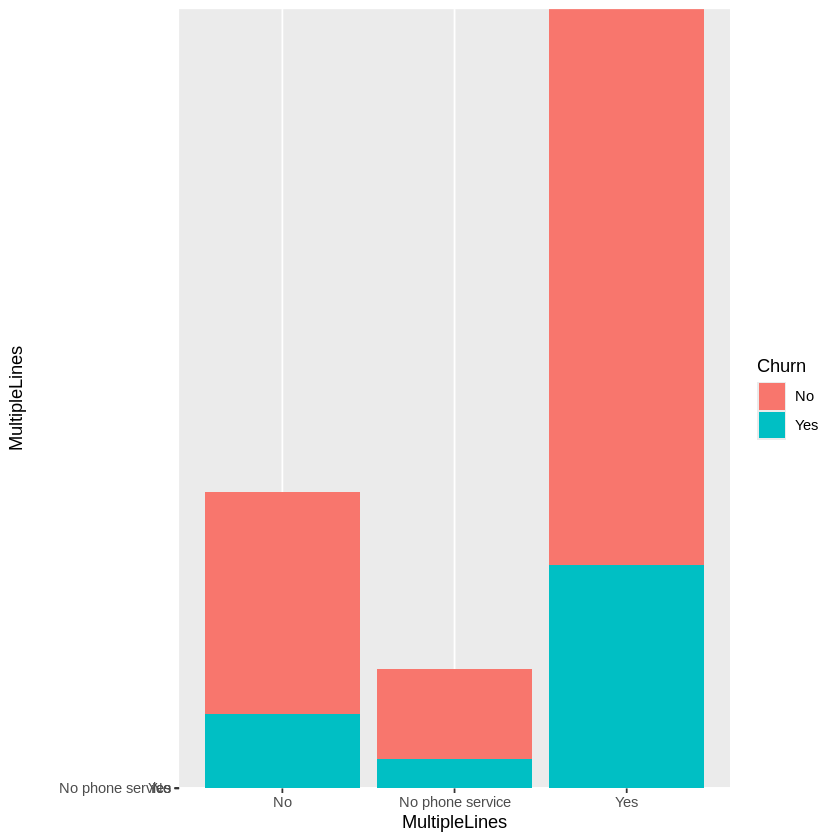

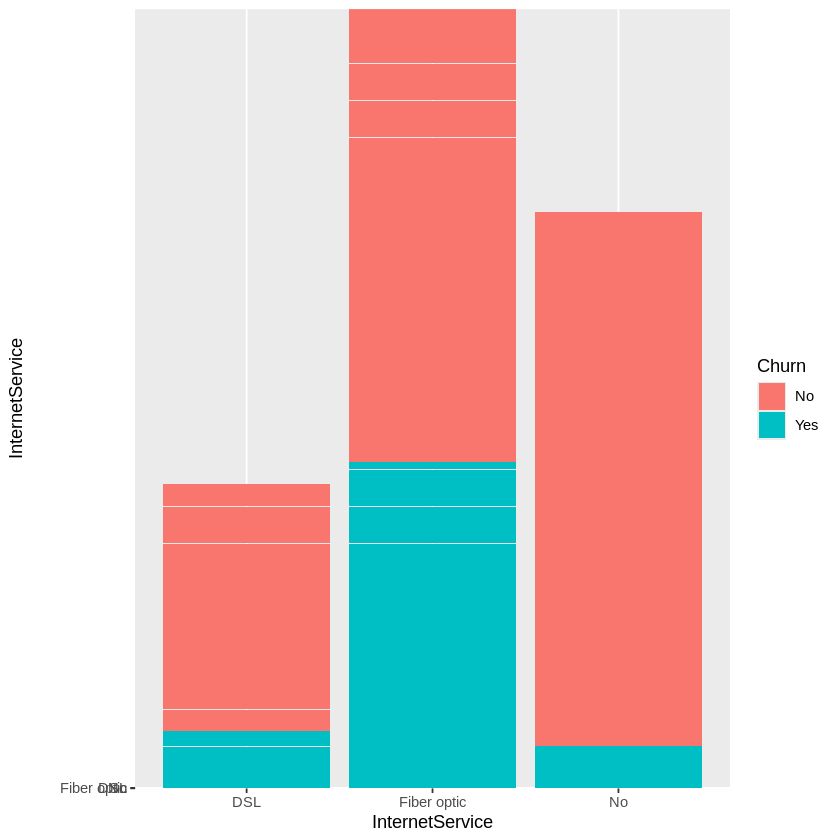

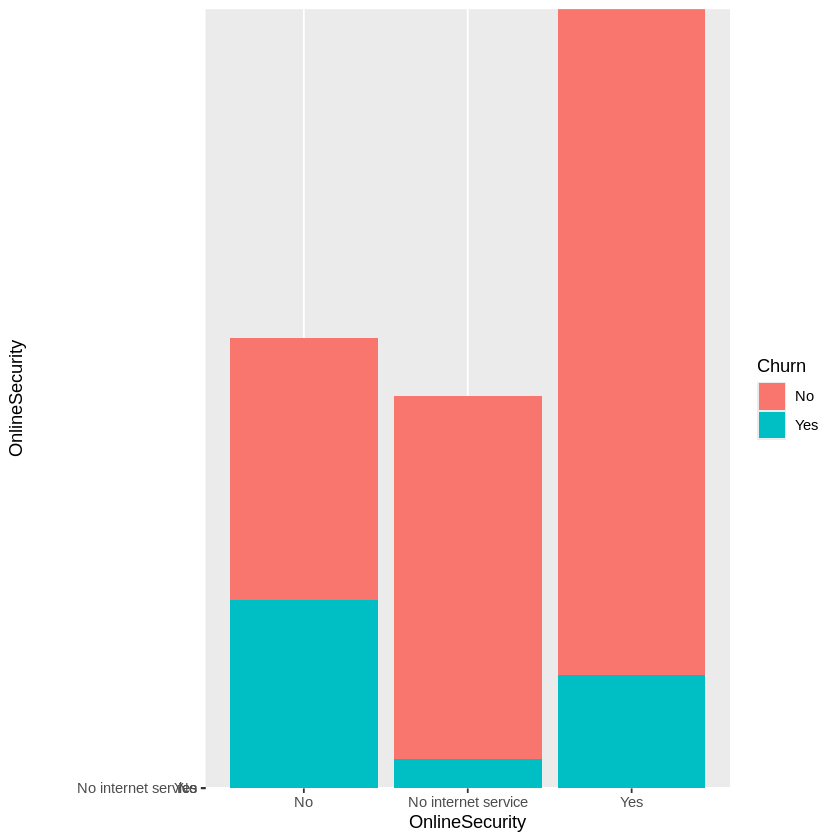

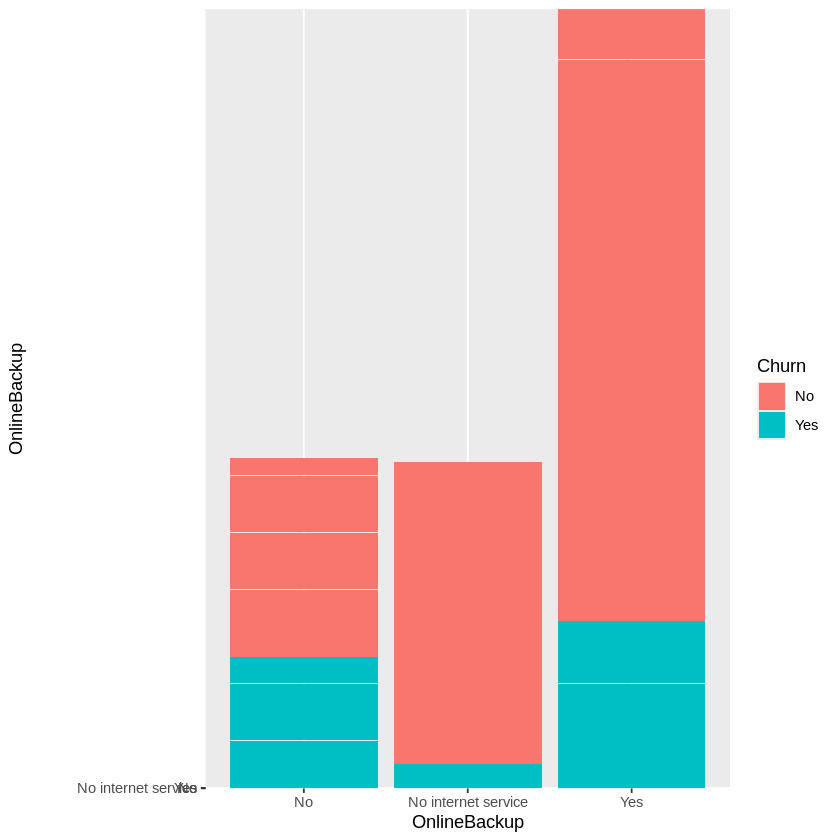

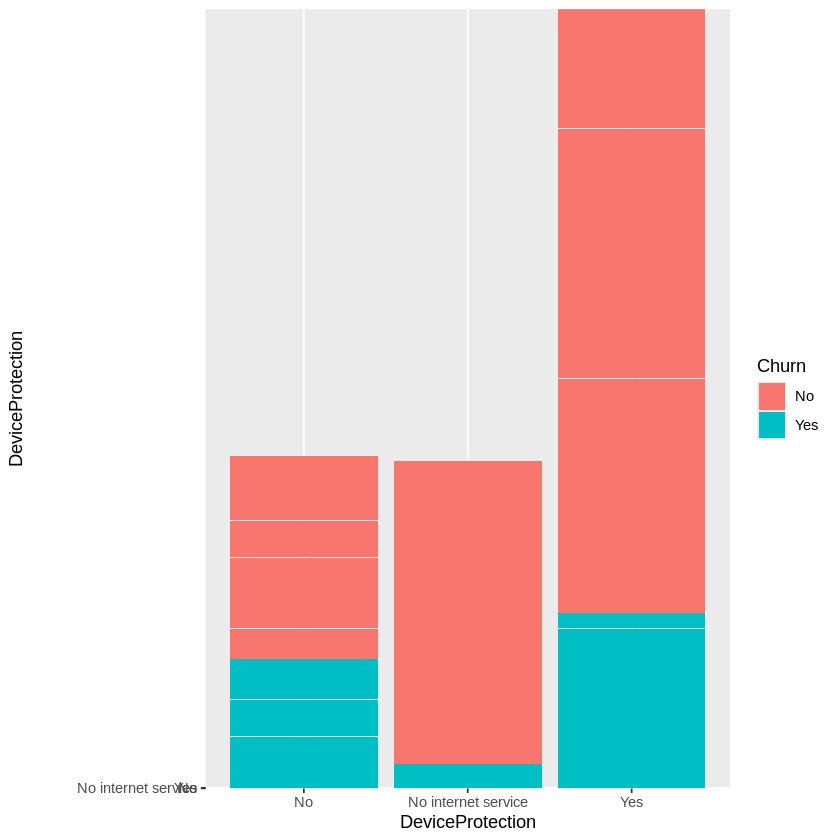

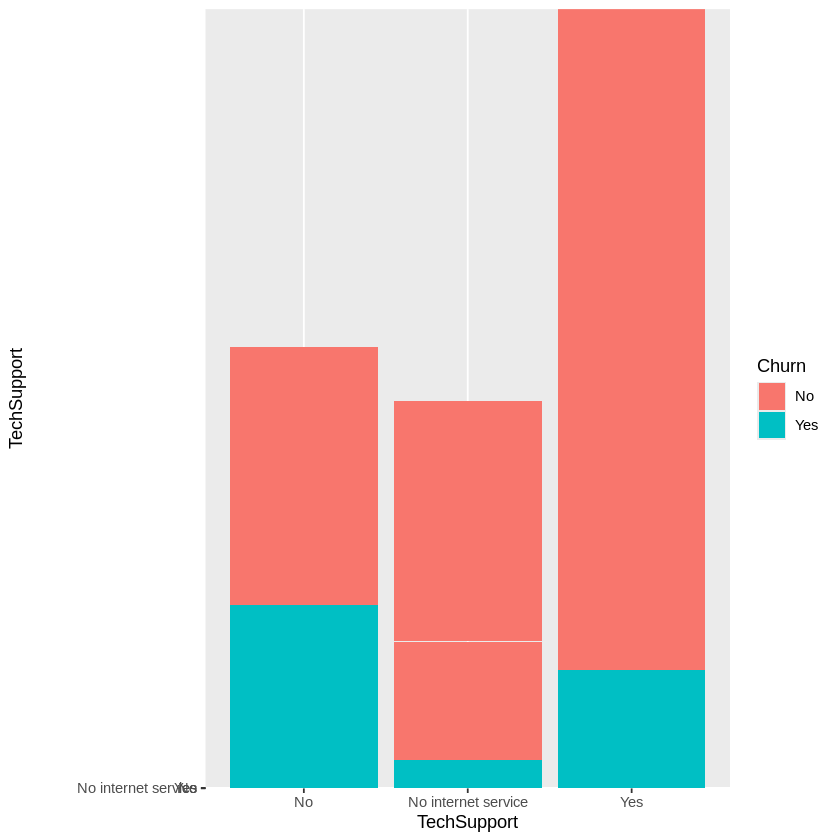

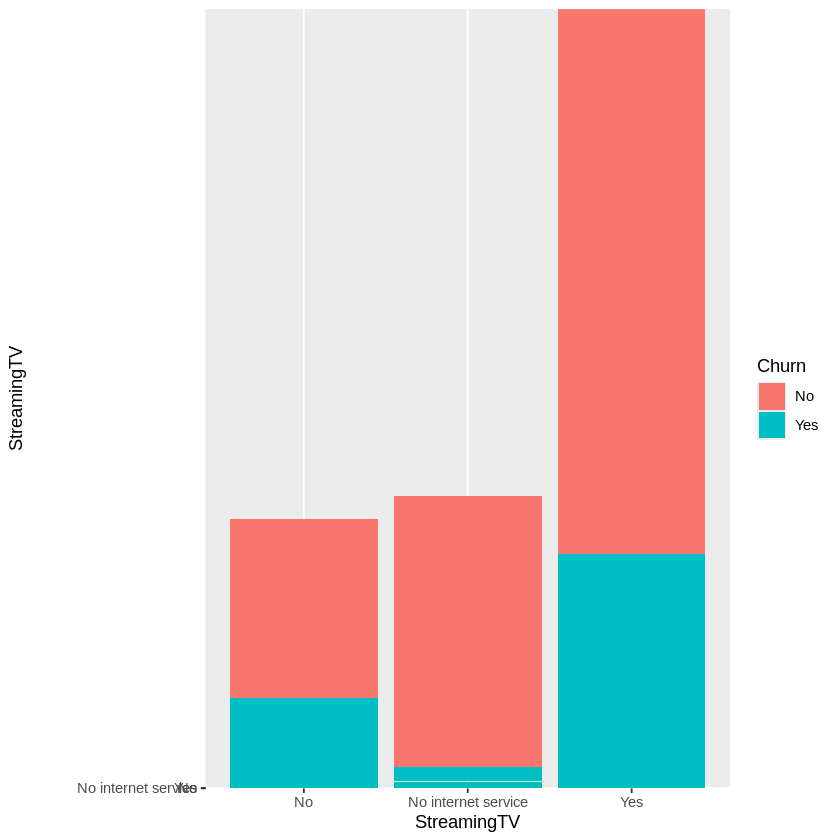

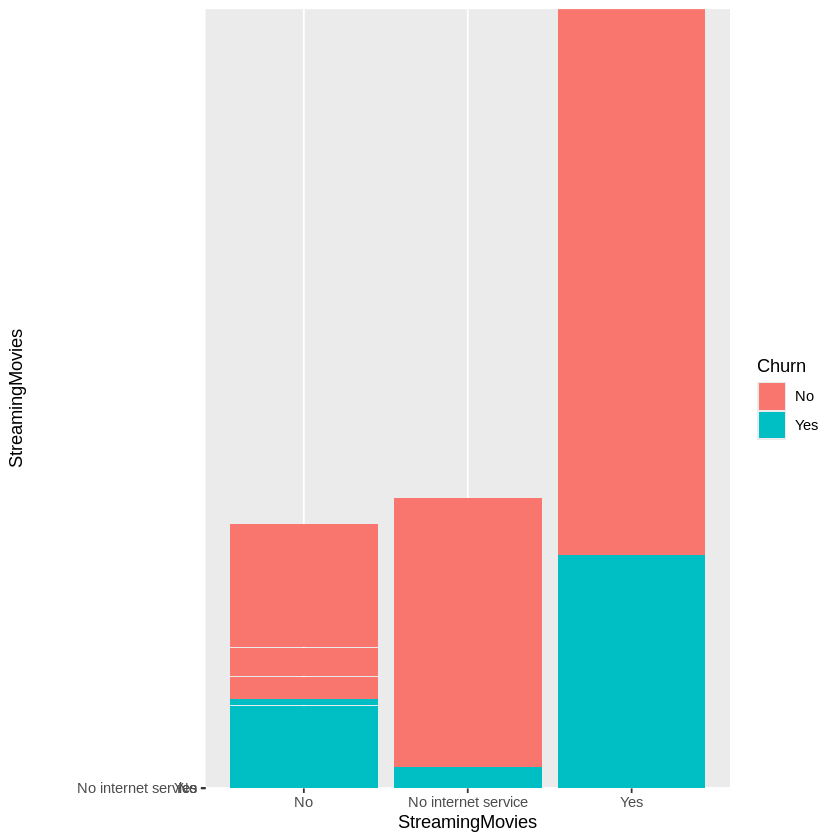

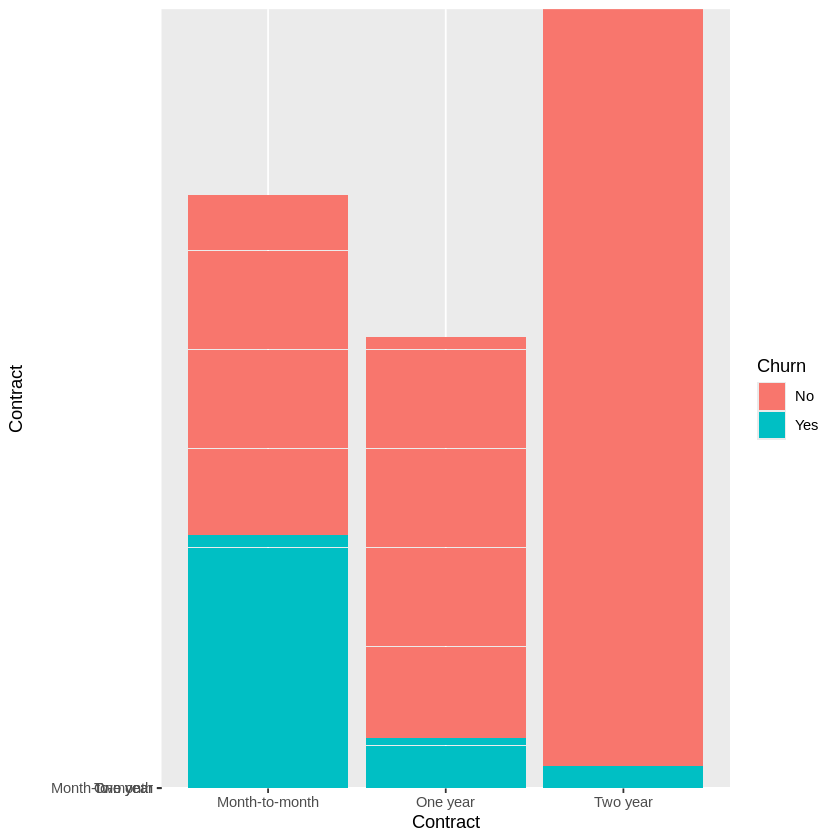

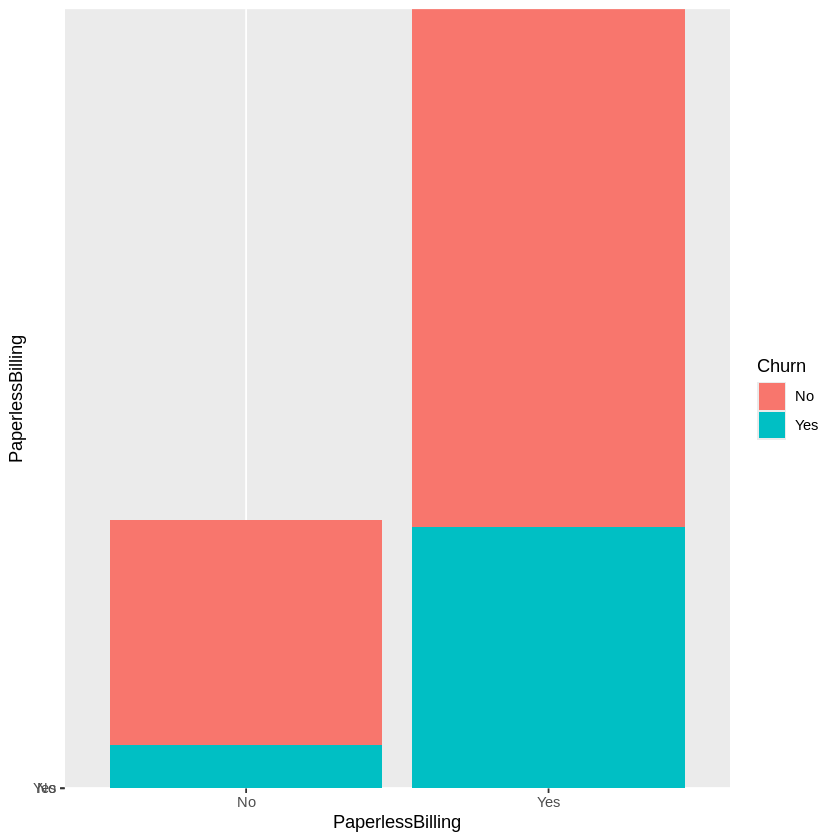

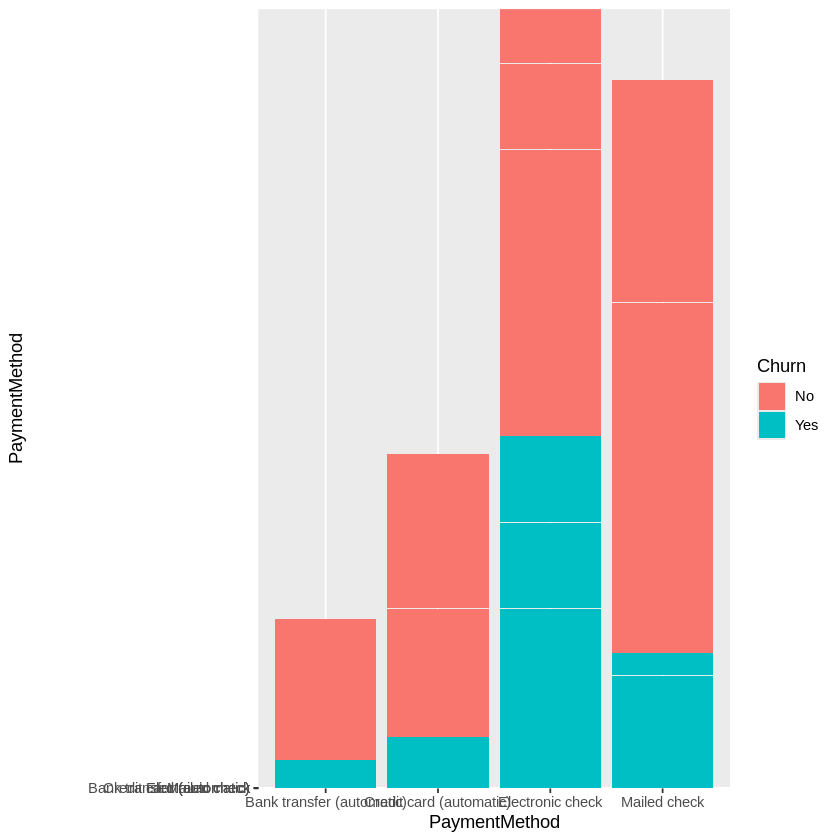

In [11]:
# verificando a classificação de cada variável - categórica
 ggplot(dados, aes(y = gender, x = gender, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Partner, x = Partner, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Dependents, x = Dependents, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PhoneService, x = PhoneService, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = MultipleLines, x = MultipleLines, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = InternetService, x = InternetService, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = OnlineSecurity, x = OnlineSecurity, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = OnlineBackup, x = OnlineBackup, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = DeviceProtection, x = DeviceProtection, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = TechSupport, x = TechSupport, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = StreamingTV, x = StreamingTV, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = StreamingMovies, x = StreamingMovies, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = Contract, x = Contract, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PaperlessBilling, x = PaperlessBilling, fill = Churn)) + geom_bar(stat = "identity")
 ggplot(dados, aes(y = PaymentMethod, x = PaymentMethod, fill = Churn)) + geom_bar(stat = "identity")


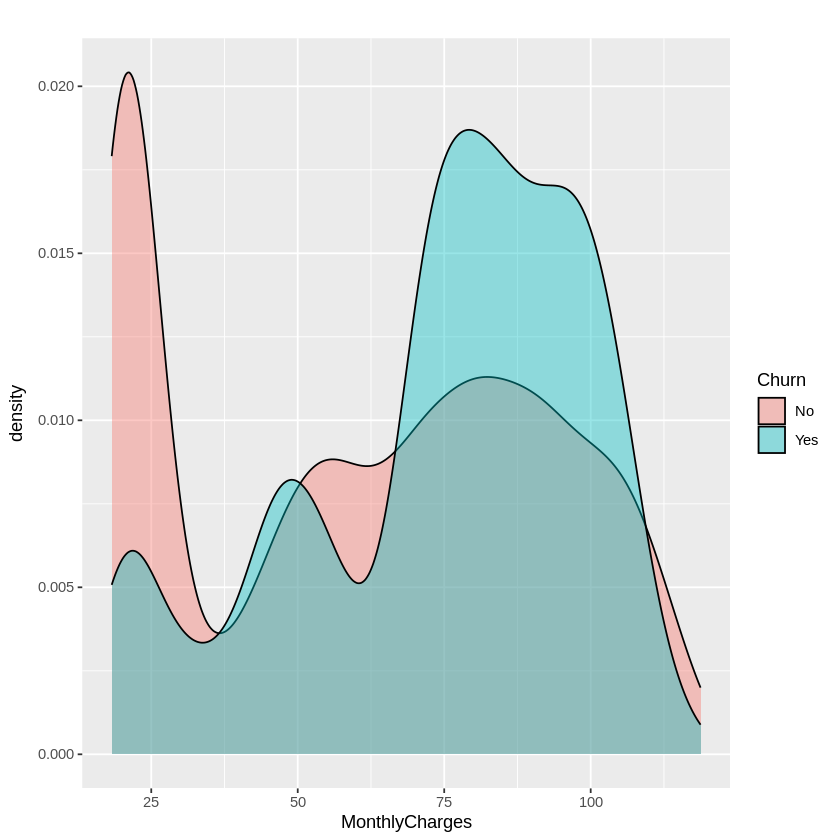

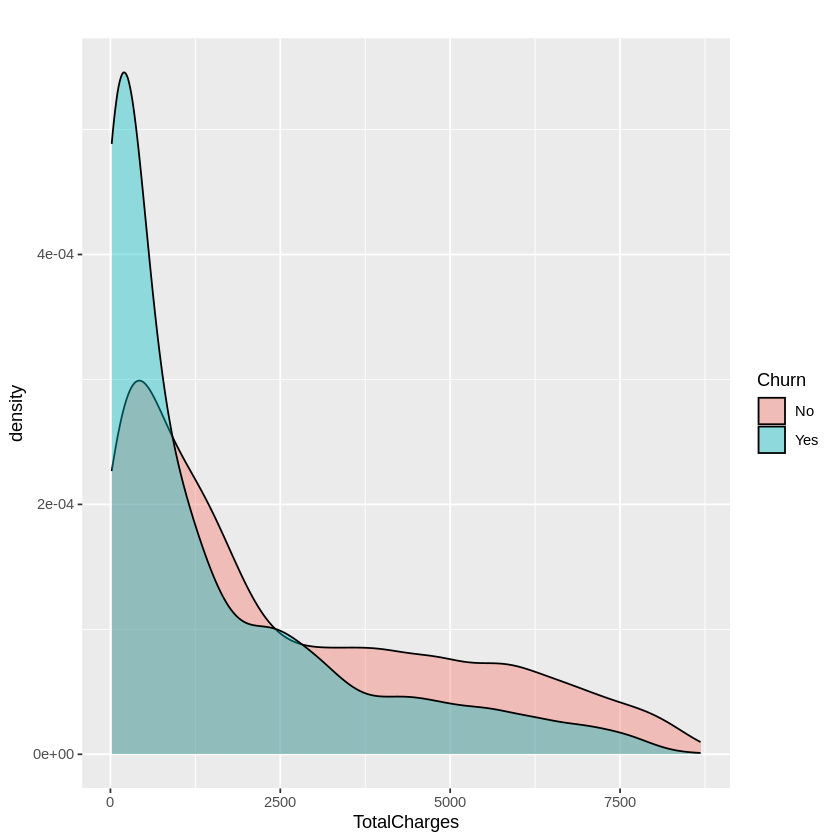

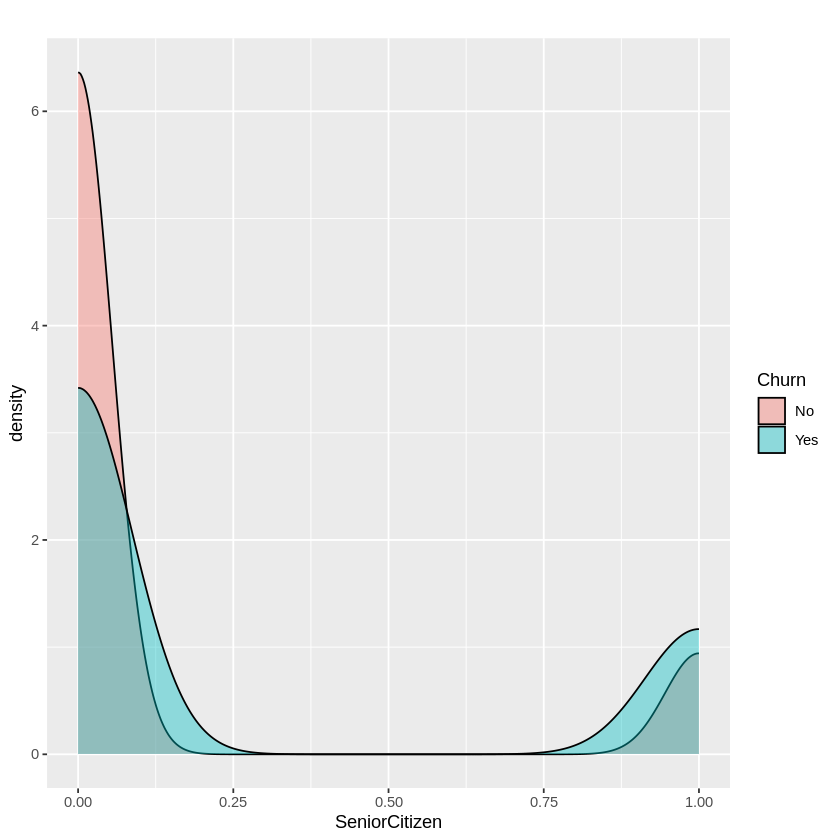

In [48]:
# verificando a classificação de cada variavel - numérica

ggplot(dados_1,
        aes(x = MonthlyCharges, fill = Churn)) +
        geom_density(alpha = 0.4) +
        labs(title = "")

ggplot(dados_1,
        aes(x = TotalCharges, fill = Churn)) +
        geom_density(alpha = 0.4) +
          labs(title = "")

ggplot(dados_1,
        aes(x = SeniorCitizen, fill = Churn)) +
        geom_density(alpha = 0.4) +
        labs(title = "")

Não identificamos a presença da variavel causal. Podemos seguir com a análise


### Preparando os dados para Regressão Logística

O primeiro modelo aplicado foi a regressão logística, que requer variáveis numéricas. Para isso, as variáveis qualitativas foram transformadas em variáveis numéricas, da seguinte forma:

- **Variáveis binárias:** codificadas como 0 ou 1, representando cada categoria.

- **Variáveis com mais de duas categorias:** transformadas em múltiplas dummies, cada uma assumindo 0 ou 1 para indicar a presença ou ausência de determinada classe.

Após a criação das dummies, as variáveis originais foram removidas para evitar redundância e multicolinearidade no modelo.

In [ ]:
# transformação de dados (qualitativo para quantitativo) - variaveis binarias
dados_quant <- dados_1
colnames (dados_quant)
dados_quant %>%
  mutate(customerID = NULL,
          PhoneService = as.factor(ifelse(PhoneService == "Yes", 1,0)),
          Partner = as.factor(ifelse(Partner == "Yes", 1,0)),
          Dependents = as.factor(ifelse(Dependents == "Yes", 1,0)),
          PaperlessBilling = as.factor(ifelse(PaperlessBilling == "Yes",1, 0)),
          Churn = as.factor(ifelse(Churn == "Yes", 1,0))
          ) -> dados_quant


In [15]:
#utilização de variaveis dummy
dummy_dados <- dados_quant %>%
  select(InternetService, Contract, PaymentMethod, MultipleLines,
          OnlineBackup, OnlineSecurity, DeviceProtection, StreamingTV,
          StreamingMovies, TechSupport)

dummy <- dummyVars(~., data = dummy_dados, fullRank =  T)

dummy_dados <- predict(dummy, dummy_dados)
dados_quant1 <- bind_cols(dados_quant, dummy_dados)

#removendo espaços
dados_quant1 %>%
  rename( InternetService.Fiberoptic = `InternetService.Fiber optic`,
          Contract.Oneyear = `Contract.One year`,
          Contract.Twoyear = `Contract.Two year`,
          PaymentMethod.Creditcard = `PaymentMethod.Credit card (automatic)`,
          PaymentMethod.Electronic = `PaymentMethod.Electronic check`,
          PaymentMethod.Mailed = `PaymentMethod.Mailed check`,
          MultipleLines.NoService = `MultipleLines.No phone service`,
          OnlineBackup.NoService = `OnlineBackup.No internet service` ,
          OnlineSecurity.NoService = `OnlineSecurity.No internet service`,
          DeviceProtection.NoService = `DeviceProtection.No internet service`,
          StreamingTV.NoService = `StreamingTV.No internet service`,
          StreamingMovies.NoService = `StreamingMovies.No internet service`,
          TechSupport.NoService = `TechSupport.No internet service`) -> dados_quant1


In [16]:
# exclusão de variaveis originais, pois vamos utilizar apenas as dummy
dados_quant1 %>%
  mutate( gender = NULL,
          InternetService = NULL,
          Contract = NULL,
          PaymentMethod = NULL,
          OnlineBackup = NULL,
          OnlineSecurity = NULL,
          StreamingMovies = NULL,
          StreamingTV = NULL,
          MultipleLines = NULL,
          DeviceProtection = NULL,
          TechSupport = NULL) -> dados_quant1

In [17]:
glimpse(dados_quant1)

Rows: 7,032
Columns: 30
$ SeniorCitizen              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner                    <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0…
$ Dependents                 <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0…
$ tenure                     <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16,…
$ PhoneService               <fct> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1…
$ PaperlessBilling           <fct> 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1…
$ MonthlyCharges             <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 8…
$ TotalCharges               <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 82…
$ Churn                      <fct> 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…
$ InternetService.Fiberoptic <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1…
$ InternetService.No         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ Contract.Oneyear           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0…
$ Contract.Twoye

Algumas variaveis ainda estão como fatores, vamos transforma-las em numéricas

In [18]:
# todas que estão com fatores <fct> transformar para numérico
dados_quant1 %>%
  mutate( Partner = as.numeric(as.character(Partner)),
          Dependents = as.numeric(as.character(Dependents)),
          PhoneService = as.numeric(as.character(PhoneService)),
          PaperlessBilling = as.numeric(as.character(PaperlessBilling)),
          Churn = as.numeric(as.character(Churn))) -> dados_num
glimpse(dados_num)

Rows: 7,032
Columns: 30
$ SeniorCitizen              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner                    <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0…
$ Dependents                 <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0…
$ tenure                     <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16,…
$ PhoneService               <dbl> 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1…
$ PaperlessBilling           <dbl> 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1…
$ MonthlyCharges             <dbl> 29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 8…
$ TotalCharges               <dbl> 29.85, 1889.50, 108.15, 1840.75, 151.65, 82…
$ Churn                      <dbl> 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…
$ InternetService.Fiberoptic <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1…
$ InternetService.No         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ Contract.Oneyear           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0…
$ Contract.Twoye

**Analisando a Correlação dos Dados**

Em seguida, foi realizada uma análise de correlação. No gráfico de correlação, quanto mais escura a bolinha, maior a correlação entre as variáveis.


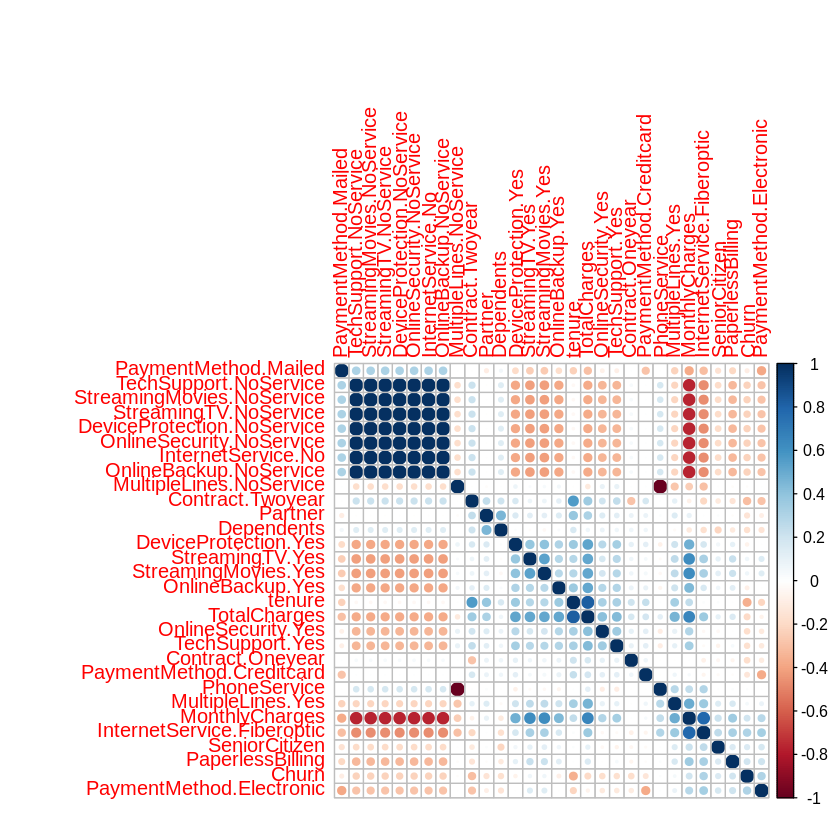

In [19]:
corrplot(cor(dados_num), order = "hclust",method = "circle")

Observou-se que variáveis relacionadas a determinados serviços apresentavam alta correlação. Ou seja, manter apenas uma variável é suficiente, pois elas carregam essencialmente o mesmo conhecimento para o modelo. Além disso, por uma questão prática e de eficiência computacional (quanto mais variáveis, maior o custo do algoritmo), optou-se por manter apenas uma variável.

In [20]:
#retirando as variaveis altamente correlacionadas

dados_num %>%
 mutate(TechSupport.NoService=NULL,
  StreamingMovies.NoService=NULL,
  StreamingTV.NoService=NULL,
  DeviceProtection.NoService=NULL,
  OnlineSecurity.NoService=NULL,
  InternetService.No=NULL,
  OnlineBackup.NoService=NULL)-> dados_num

**Balanceamento da Base de Dados**

Para equilibrar a variável churn, foi aplicado o método *undersampling*, reduzindo aleatoriamente os registros da classe majoritária até igualar o número de observações da classe minoritária. Após o balanceamento, ambas as classes possuem a mesma quantidade de observações, evitando viés no modelo preditivo.

In [21]:
#balanceamento de base de dados
dados_quant1 %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

dados_quant1 %>%
  filter(Churn == 0) %>%
  sample_n(1869) -> dados_quant_0

dados_quant1 %>%
  filter(Churn == 1) -> dados_quant_1

dados_quant_balanc <- bind_rows(dados_quant_0,dados_quant_1)

dados_num %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

dados_num %>%
  mutate(Churn = ifelse(Churn == 1,0,1))%>%
  filter(Churn == 0) %>%
  sample_n(1869) -> dados_num_0

dados_num %>%
  mutate(Churn = ifelse(Churn == 1,0,1))%>%
  filter(Churn == 1) -> dados_num_2

dados_num_balanc <- bind_rows(dados_num_2,dados_num_0)

dados_num_balanc %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

dados_quant_balanc %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

Churn,n
<fct>,<int>
0,5163
1,1869


Churn,n
<dbl>,<int>
0,5163
1,1869


Churn,n
<dbl>,<int>
0,1869
1,5163


Churn,n
<fct>,<int>
0,1869
1,1869


**Seleção de Variáveis (Stepwise)**

Para otimizar o modelo de regressão logística, foi utilizada a técnica stepwise, baseada no AIC (Akaike Information Criterion).

O comando `step(modelo_teste1)` retornou o modelo final otimizado, mantendo apenas as variáveis relevantes, ou seja, aquelas com p-valor < 0,05, garantindo maior robustez e simplicidade do modelo.

In [ ]:
#stepwise
#verificar quais as variaveis agregam ao modelo

modelo_teste1 <- glm(data = dados_num_balanc, Churn ~ ., family=binomial)
step(modelo_teste1)
summary(modelo_teste1)

##Validação cruzada

Para avaliar a capacidade de generalização do modelo, utilizamos validação cruzada k-fold. Por padrão, o R utiliza k = 10, ou seja, os dados são divididos em 10 subconjuntos (folds). O modelo é treinado em k-1 partes e testado na parte restante, repetindo o processo até que cada subconjunto seja utilizado como teste. Assim, a base foi dividida em 80% para treino e 20% para teste.

In [23]:
trainIndex <- createDataPartition(dados_num_balanc$Churn, p = .8, #80%
                                    list = FALSE,
                                    times = 1)

vivoTrain <- dados_num_balanc[ trainIndex,]
vivoTest  <- dados_num_balanc[-trainIndex,]

## Regressão Logistica

Com a base preparada, o modelo de regressão logística foi treinado utilizando os dados de treino

In [24]:
# treinando o modelo de regressão logistica
set.seed(150)

glm_model = train(Churn ~ SeniorCitizen + Dependents + tenure + PhoneService +
              PaperlessBilling + MonthlyCharges + TotalCharges + Contract.Oneyear +
              Contract.Twoyear + PaymentMethod.Electronic + MultipleLines.Yes +
              OnlineBackup.Yes + OnlineSecurity.Yes + DeviceProtection.Yes,
                  method= "glm",
                  trControl = trainControl(method = "cv"),
                  family = "binomial",
                  data = vivoTrain
                  )

summary(glm_model)



Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”



Call:
NULL

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               6.413e-01  1.722e-01   3.724 0.000196 ***
SeniorCitizen            -2.576e-01  9.340e-02  -2.758 0.005824 ** 
Dependents                2.327e-01  9.078e-02   2.564 0.010349 *  
tenure                    5.926e-02  6.723e-03   8.814  < 2e-16 ***
PhoneService              9.744e-01  1.430e-01   6.813 9.57e-12 ***
PaperlessBilling         -2.743e-01  8.232e-02  -3.332 0.000863 ***
MonthlyCharges           -2.420e-02  2.408e-03 -10.049  < 2e-16 ***
TotalCharges             -2.844e-04  7.579e-05  -3.752 0.000175 ***
Contract.Oneyear          7.519e-01  1.199e-01   6.271 3.60e-10 ***
Contract.Twoyear          1.417e+00  1.895e-01   7.476 7.64e-14 ***
PaymentMethod.Electronic -4.145e-01  7.701e-02  -5.382 7.37e-08 ***
MultipleLines.Yes        -1.806e-01  8.968e-02  -2.013 0.044067 *  
OnlineBackup.Yes          2.500e-01  8.713e-02   2.869 0.004112 ** 
OnlineSecurity.Yes   

In [25]:
varImp(glm_model)


glm variable importance

                         Overall
MonthlyCharges           100.000
tenure                    85.232
Contract.Twoyear          69.226
OnlineSecurity.Yes        66.555
PhoneService              61.288
Contract.Oneyear          54.800
PaymentMethod.Electronic  44.169
TotalCharges              24.671
PaperlessBilling          19.640
OnlineBackup.Yes          14.110
SeniorCitizen             12.772
Dependents                10.455
MultipleLines.Yes          3.869
DeviceProtection.Yes       0.000

Os fatores mais determinantes para a evasão de clientes estão relacionados a:

- Cobranças mais altas (MonthlyCharges)
- Duração do relacionamento com a empresa (tenure)
- Tipo de contrato (Contract.Oneyear e Contract.Twoyear)

Fatores demográficos, como idade ou número de dependentes, têm impacto menor na previsão. Além disso, variáveis como quantidade de linhas ativas (MultipleLines) e a presença de proteção de dispositivo (DeviceProtection) não agregam informações relevantes para prever o churn.



Após o treinamento, foram realizadas predições sobre o conjunto de teste, que não foi utilizado durante o ajuste do modelo.




In [26]:
#Testando a base

reg_log_pred <- predict(glm_model,vivoTrain)
reg_log_pred1 <- data.frame(reg_log_pred)
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred >= 0.5,1,0))
reg_log_pred1$reg_log_pred <- as.factor(ifelse(reg_log_pred1$reg_log_pred == 1,"evadido","cliente"))

vivoTrain$Churn <- as.factor(vivoTrain$Churn)
vivoTrain$Churn <- as.factor(ifelse(vivoTrain$Churn == 1,"evadido","cliente"))

glimpse(reg_log_pred1)

matrix_reg <-
confusionMatrix(data = reg_log_pred1$reg_log_pred, reference = vivoTrain$Churn, positive = "evadido")
 matrix_reg$table


Rows: 5,626
Columns: 1
$ reg_log_pred <fct> cliente, evadido, evadido, evadido, evadido, evadido, eva…


          Reference
Prediction cliente evadido
   cliente     832     423
   evadido     680    3691

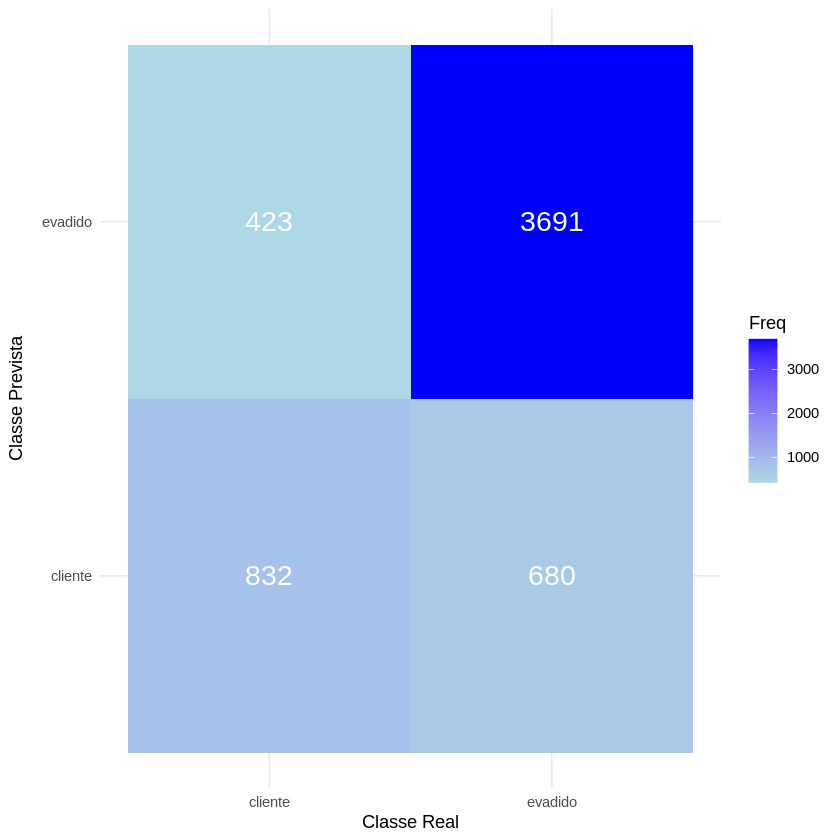

In [27]:
# Plotando a matriz de confusão

# Transformar a tabela em data frame para ggplot
cm_df <- as.data.frame(matrix_reg$table)
colnames(cm_df) <- c("Real", "Previsto", "Freq")

ggplot(cm_df, aes(x = Real, y = Previsto, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "blue") +
  labs(x = "Classe Real",
       y = "Classe Prevista") +
  theme_minimal()

Pela matriz de confusão, podemos concluir:

- O modelo acerta mais ao prever clientes que evadiram (3691) do que clientes que permaneceram (832).

- Há um número considerável de falsos positivos e falsos negativos, o que pode indicar que o modelo tende a superestimar a evasão.

## Desempenho do Modelo de Regressão Logística

In [28]:
 metricas <- data.frame(matrix_reg$byClass)
 metricas

,matrix_reg.byClass
,<dbl>
Sensitivity,0.8971804
Specificity,0.5502646
Pos Pred Value,0.8444292
Neg Pred Value,0.6629482
Precision,0.8444292
Recall,0.8971804
F1,0.8700059
Prevalence,0.7312478
Detection Rate,0.6560611


Analisando as métricas do modelo:

- **F1-Score**: Média entre a precisão e recall. Um valor alto (87%) indica bom equilíbrio entre identificar corretamente clientes evadidos e não gerar muitos falsos positivos.

- **Especificidade**: Apenas 55% dos clientes que permaneceram foram corretamente identificados. Indica que o modelo tem mais dificuldade em prever clientes ativos (mais falsos positivos).

- **Precisão**: Quando o modelo prevê que um cliente irá evadir, ele está correto 84,4% das vezes.

- **Sensibilidade e Recall:** O modelo identifica corretamente 89,7% dos clientes que evadiram.

- **Acuracia** Considera tanto a sensibilidade quanto a especificidade, ajustando para o desbalanceamento das classes.

O modelo é muito bom em prever clientes que evadem (alta sensibilidade e F1-score), mas tem desempenho menor para prever clientes ativos (especificidade moderada)


# Árvore de decisão

**Preparando os Dados para Árvore de Decisão**

Ao contrário da regressão logística, o modelo de árvore de decisão trabalha melhor com variáveis qualitativas. Assim, retornaremos aos dados originais e transformaremos as variáveis numéricas em categóricas.

In [29]:
#visualizando os dados originais
head(dados_1)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [36]:
#excluindo o ID do cliente
#transformar em qualitativas as quantitativas
#adicionar classe as variaveis numéricas

dados_1 %>%
  mutate(SeniorCitizen = as.factor(ifelse(SeniorCitizen == 1, "Yes", "No")),
          customerID = NULL) -> dados_quali

In [31]:
#criando classes para as variaveis quantitativas
 tenure <- summary(dados_quali$tenure)
 tenure

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   29.00   32.42   55.00   72.00 

In [37]:
TotalCharges <- summary(dados_quali$TotalCharges)

min_TotalCharges <- TotalCharges[[1]]-5
q1_TotalCharges <- TotalCharges[[2]]
q2_TotalCharges <- TotalCharges[[3]]
q3_TotalCharges <- TotalCharges[[5]]
max_TotalCharges <- TotalCharges[[6]]+5

dados_quali %>%
  mutate(TotalCharges = cut(TotalCharges, breaks = c(min_TotalCharges,
                            q1_TotalCharges,
                            q2_TotalCharges,
                            q3_TotalCharges,
                            max_TotalCharges)))-> dados_quali

 summary(dados_quali$TotalCharges)

(13.8,401]       (401,1.4e+03]  (1.4e+03,3.79e+03] (3.79e+03,8.69e+03] 
               1758                1758                1758                1758

Após transformar as variáveis numéricas em categóricas, seguimos para o balanceamento da base de dados.


In [33]:
#balanceamento da base

glimpse(dados_quali)
dados_quali %>%
   select(Churn) %>%
   group_by(Churn) %>%
   summarise(n = n())

dados_quali %>%
   filter(Churn == "No") %>%
   sample_n(1869)-> dados_quali_no

dados_quali %>%
   filter(Churn == "Yes")-> dados_quali_yes

dados_quali_balanc <- bind_rows(dados_quali_no,dados_quali_yes)

dados_quali_balanc %>%
  select(Churn) %>%
  group_by(Churn) %>%
  summarise(n = n())

Rows: 7,032
Columns: 20
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Femal…
$ SeniorCitizen    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, N…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Ye…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, No…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, Y…
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes, …
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber o…
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No …
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No in…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No in…
$ TechSupport      <fct> No, No, No, Yes, No, No, No, No, Yes, No, No, No inte…
$ StreamingTV   

Churn,n
<fct>,<int>
No,5163
Yes,1869


Churn,n
<fct>,<int>
No,1869
Yes,1869


**Separação da base para teste e treino**

In [34]:
 trainIndex_quali <- createDataPartition(dados_quali_balanc$Churn, p = .8,
                                        list = FALSE,
                                        times = 1)

 vivoTrain_quali <- dados_quali_balanc[ trainIndex_quali,]
 vivoTest_quali <- dados_quali_balanc[-trainIndex_quali,]

Com a base preparada, categorizada e balanceada, o modelo de árvore de decisão foi treinado utilizando os dados de treino.

In [38]:
vivo.tree = train(Churn ~ .,
                  data= vivoTrain_quali,
                  method="rpart",
                  trControl = trainControl(method = "cv"))

In [39]:
vivo.tree

CART 

2992 samples
  19 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2694, 2692, 2693, 2693, 2693, 2692, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02941176  0.7419849  0.4839852
  0.18248663  0.6925245  0.3850178
  0.28676471  0.5631709  0.1280225

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02941176.

In [ ]:
#instalando pacotes necessarios para gerar a árvore de decisão
install.packages("rpart.plot")
install.packages("rattle")

In [ ]:
library(rpart.plot)
library(rattle)

Após treinar o modelo, a árvore de decisão foi plotada, permitindo visualizar as regras de decisão que o modelo utilizou para classificar os clientes

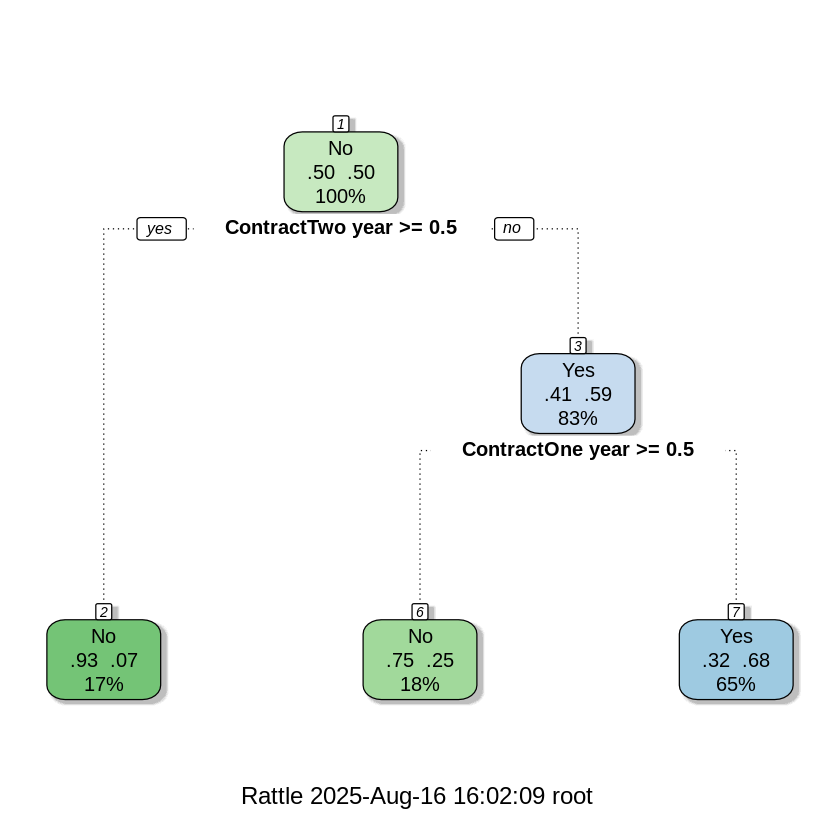

In [42]:
#Plotando a árvore

fancyRpartPlot(vivo.tree$finalModel)

Após o treinamento, foram realizadas predições sobre o conjunto de teste, que não foi utilizado durante o ajuste do modelo

In [43]:
#testando a base
vivo.pred = predict(vivo.tree, newdata = vivoTrain_quali)


In [46]:
# Matriz de confusão

matrix_tree <- confusionMatrix(data = vivo.pred, reference = vivoTrain_quali$Churn, positive = "Yes")
matrix_tree$table

          Reference
Prediction   No  Yes
       No   875  173
       Yes  621 1323

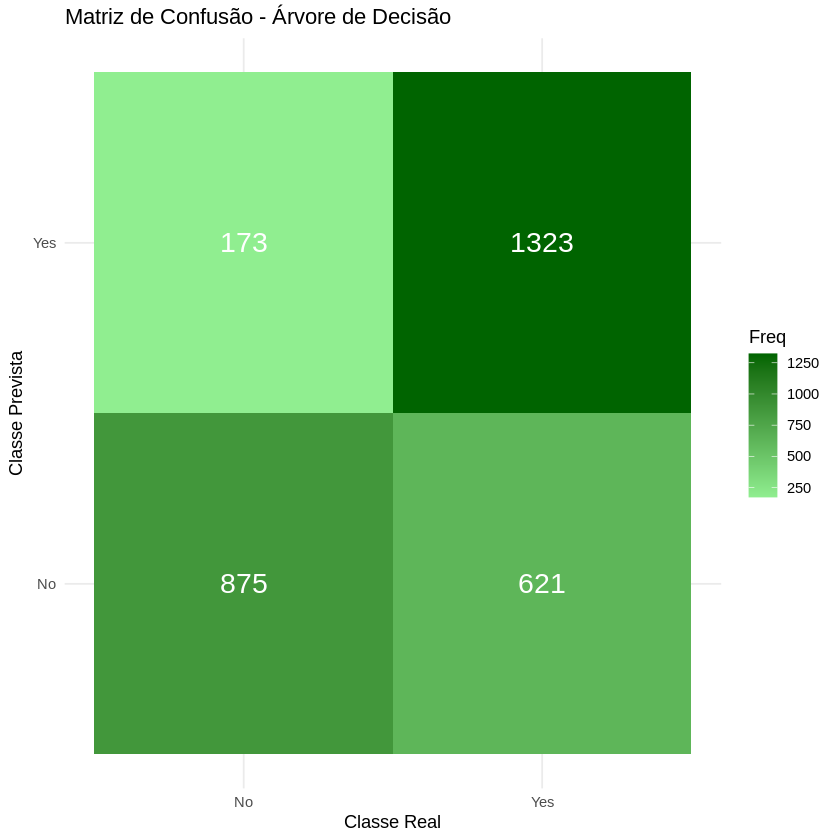

In [45]:
# Transformar a tabela em data frame para ggplot
cm_df <- as.data.frame(matrix_tree$table)
colnames(cm_df) <- c("Real", "Previsto", "Freq")

# Plotando a matriz de confusão
ggplot(cm_df, aes(x = Real, y = Previsto, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightgreen", high = "darkgreen") +
  labs(title = "Matriz de Confusão - Árvore de Decisão",
       x = "Classe Real",
       y = "Classe Prevista") +
  theme_minimal()

Pela matriz de confusão, podemos ver:

* Churn corretamente previsto: 1.323
* Clientes corretamente previstos como não churn: 875
* Falsos negativos: 621 (churn não identificado)
* Falsos positivos: 173 (clientes previstos como churn, mas permaneceram)


## Desempenho do Modelo Árvore de decisão

In [47]:
 metricas_tree <- data.frame(matrix_tree$byClass)
 metricas_tree

,matrix_tree.byClass
,<dbl>
Sensitivity,0.8843583
Specificity,0.5848930
Pos Pred Value,0.6805556
Neg Pred Value,0.8349237
Precision,0.6805556
Recall,0.8843583
F1,0.7691860
Prevalence,0.5000000
Detection Rate,0.4421791


Analisando as métricas do modelo:

- **F1-Score:** Média entre a precisão e e recall. Um valor de 76,9% mostra bom equilíbrio entre identificar clientes que evadiram e evitar muitos falsos positivos.

- **Especificidade:** Apenas 58,5% dos clientes que permaneceram foram corretamente identificados. Indica que o modelo tem mais dificuldade em prever clientes ativos (mais falsos positivos).

- **Precisão:** Quando o modelo prevê que um cliente irá evadir, ele está correto, aproximadamente, 68,% das vezes.

- **Sensibilidade e Recall:** O modelo identifica corretamente 88,5% dos clientes que evadiram.



---


## Conclusão

**Qual modelo escolher? Depende do foco do negócio:**

* **A regressão logística** se destaca por gerar previsões mais confiáveis de churn (menos falsos positivos).

* **A árvore de decisão** apresenta desempenho mais equilibrado entre clientes que evadem e que permanecem.

Como o objetivo da analise consiste em prever a evasão de clientes (churn), o modelo de regressão logistica se saiu melhor. Mas no geral, ambos os modelos são eficazes na previsão de churn e podem ser combinados para aproveitar o melhor de cada um.